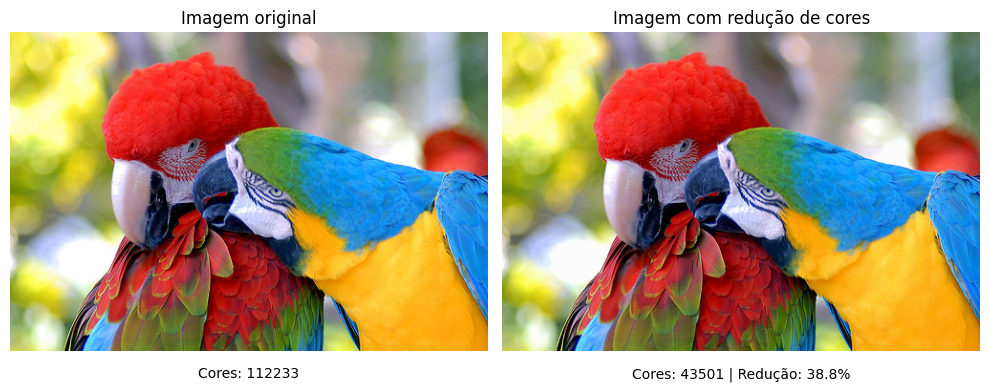

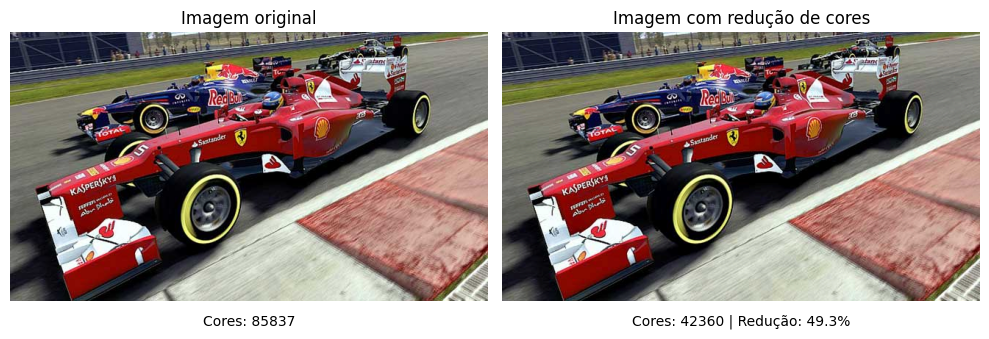

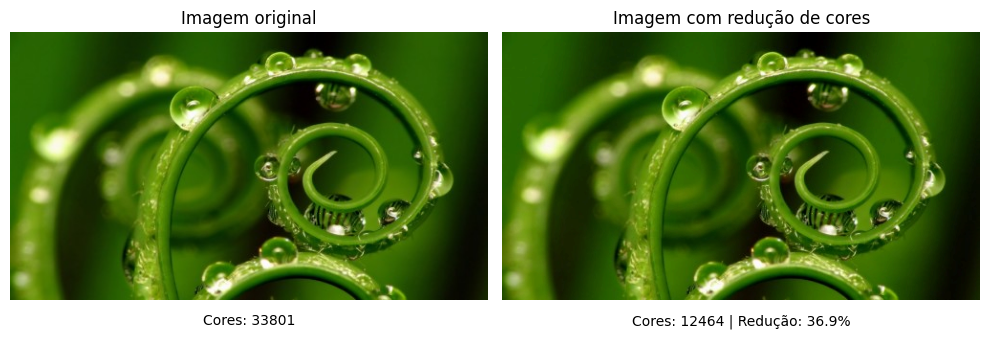

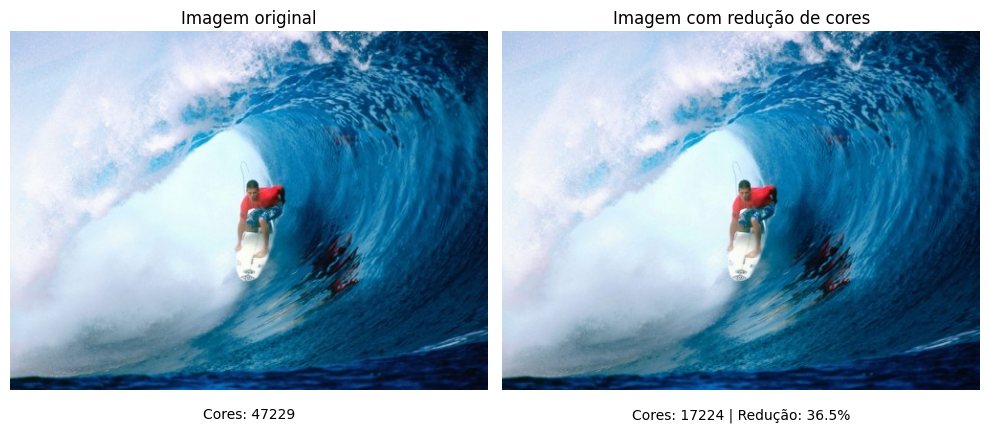

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imagens
imagens_paths = [
    'imgs\\Q3\\araras.png',
    'imgs\\Q3\\F1.png',
    'imgs\\Q3\\green-water.png',
    'imgs\\Q3\\surf.png'
]

for _, path in enumerate(imagens_paths):
    imagem_bgr = cv2.imread(path)
    imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

    # Conta cores da imagem original
    pixels_orig = imagem_rgb.reshape(-1, 3) # transforma a imagem em uma lista onde cada linha contém um vetor com 3 valores: [R, G, B]
    total_cores_originais = len(np.unique(pixels_orig, axis=0)) # Conta a quantidade de cores únicas

    for bins in range(2, 257):
        largura_bin = 256 // bins

        # A quantização é feita dividindo cada valor RGB pela largura do intervalo (bin) com divisão inteira,
        # e depois multiplicando novamente pela mesma largura. Isso força os valores de R, G e B a se alinharem
        # aos limites inferiores dos intervalos definidos, agrupando cores semelhantes.
        img_reduzida = (imagem_rgb // largura_bin) * largura_bin

        # Conta cores da imagem reduzida
        pixels_reduzidos = img_reduzida.reshape(-1, 3)
        total_cores_reduzidas = len(np.unique(pixels_reduzidos, axis=0))

        perc_reducao = total_cores_reduzidas / total_cores_originais

        # Caso a quantidade de cores após a quantização esteja entre 33% e 50% da imagem original,
        # exibe a imagem original e a quantizada lado a lado
        if (1/3) <= perc_reducao <= 0.5: 

            fig, axs = plt.subplots(1, 2, figsize=(10, 5))

            axs[0].imshow(imagem_rgb)
            axs[0].axis('off')
            axs[0].set_title("Imagem original")
            axs[0].text(0.5, -0.05,
                        f"Cores: {total_cores_originais}",
                        ha='center', va='top', transform=axs[0].transAxes, fontsize=10)

            axs[1].imshow(img_reduzida)
            axs[1].axis('off')
            axs[1].set_title("Imagem com redução de cores")
            axs[1].text(0.5, -0.05,
                        f"Cores: {total_cores_reduzidas} | Redução: {perc_reducao*100:.1f}%",
                        ha='center', va='top', transform=axs[1].transAxes, fontsize=10)

            plt.tight_layout()
            plt.show()
            break # Interrompe o laço após encontrar a primeira quantização dentro do intervalo desejado